# Регрессионный анализ

## Задача 2

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

%matplotlib inline

In [2]:
data = pd.read_csv('Prostate_train_2020.csv')
data.head()

,id,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,1,-0.579818,2.769459,50.0,-1.386294,0.0,-1.386294,6.0,0.0,-0.430783
1,2,-0.994252,3.319626,58.0,-1.386294,0.0,-1.386294,6.0,0.0,-0.162519
2,3,-0.510826,2.691243,74.0,-1.386294,0.0,-1.386294,7.0,20.0,-0.162519
3,4,-1.203973,3.282789,58.0,-1.386294,0.0,-1.386294,6.0,0.0,-0.162519
4,5,0.751416,3.432373,62.0,-1.386294,0.0,-1.386294,6.0,0.0,0.371564


Разобьём данные на train и test, зная, что таргет отсутствует у тестовой части выборки.

In [3]:
test_indexes = np.where(data.isnull().values[:,-1])
train_indexes = np.where(data.isnull().values[:,-1] == False)
test_data = data.iloc[test_indexes]
train_data = data.iloc[train_indexes]

Используем линейную регрессию.

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()
lr.fit(np.array(train_data)[:,:-1], np.array(train_data)[:,-1])
prediction = lr.predict(np.array(train_data)[:,:-1])

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
np.sqrt(mean_squared_error(prediction, np.array(train_data)[:,-1]))

0.30075116444279404

Визуализируем данные, чтобы понять, можно ли улучшить модель

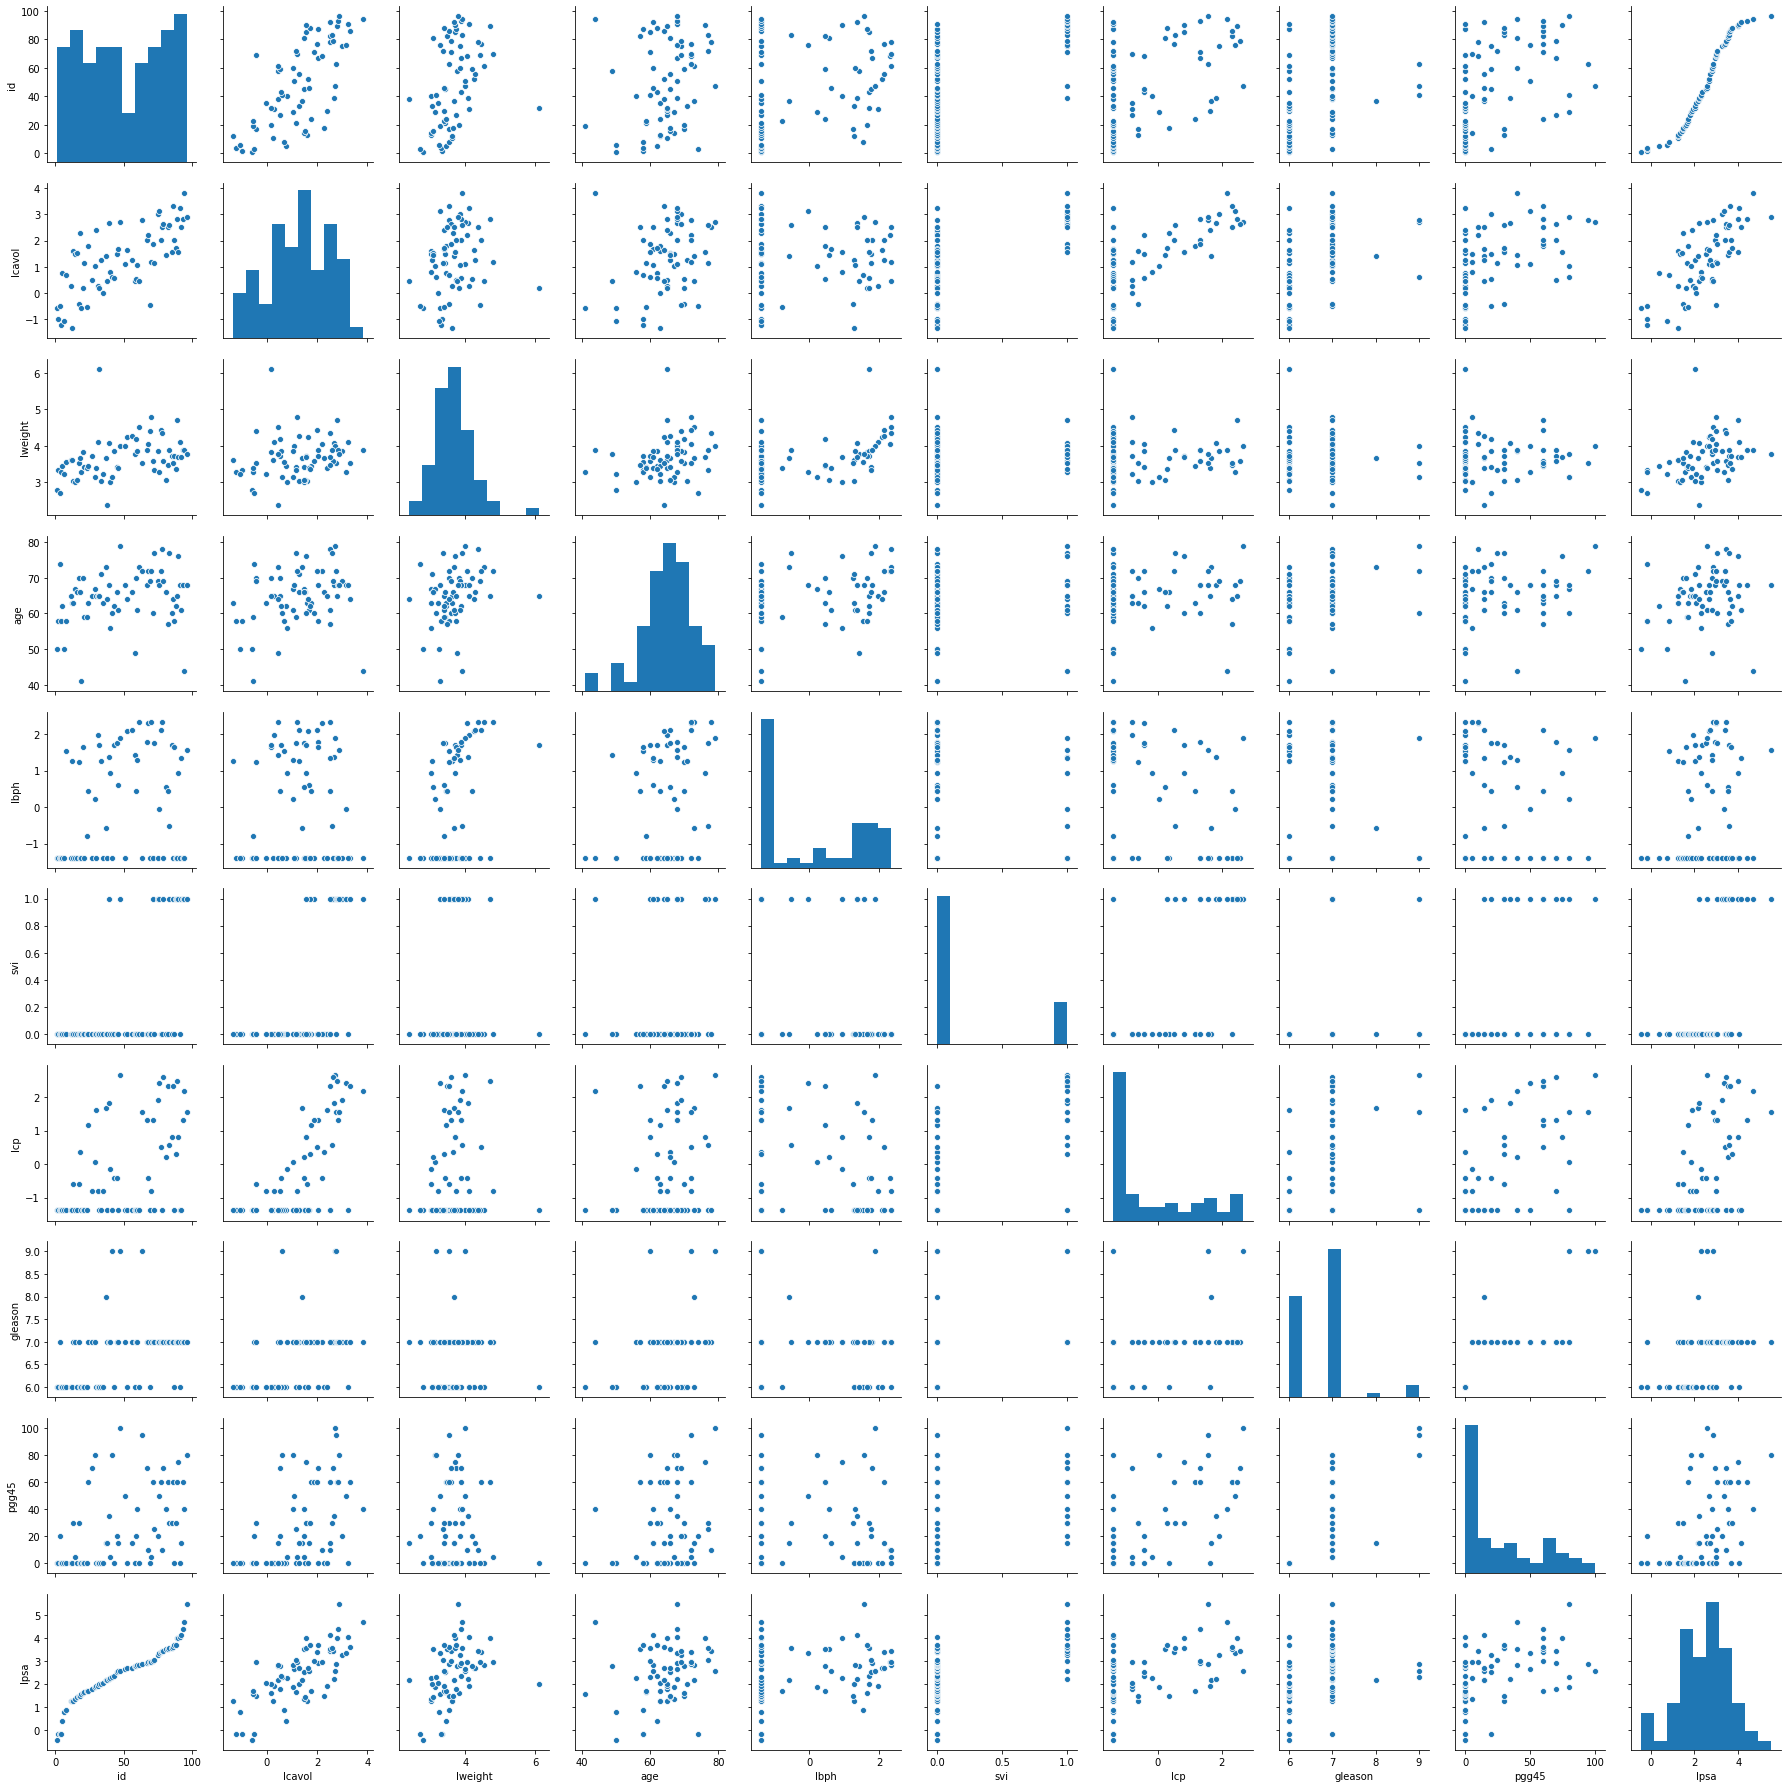

In [8]:
sns.pairplot(train_data)
plt.show()

Видим сильную зависимость таргета от id, причём функция напоминает кубическую: добавим признаки $id^2$ и $id^3$.

In [9]:
data['id^2'] = data['id'] ** 2
data['id^3'] = data['id'] ** 3

In [10]:
data.head()

,id,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,id^2,id^3
0,1,-0.579818,2.769459,50.0,-1.386294,0.0,-1.386294,6.0,0.0,-0.430783,1,1
1,2,-0.994252,3.319626,58.0,-1.386294,0.0,-1.386294,6.0,0.0,-0.162519,4,8
2,3,-0.510826,2.691243,74.0,-1.386294,0.0,-1.386294,7.0,20.0,-0.162519,9,27
3,4,-1.203973,3.282789,58.0,-1.386294,0.0,-1.386294,6.0,0.0,-0.162519,16,64
4,5,0.751416,3.432373,62.0,-1.386294,0.0,-1.386294,6.0,0.0,0.371564,25,125


In [11]:
test_indexes = np.where(data.isnull().values[:,-3])
train_indexes = np.where(data.isnull().values[:,-3] == False)
test_data = data.iloc[test_indexes]
train_data = data.iloc[train_indexes]

In [12]:
train_data.head()

,id,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,id^2,id^3
0,1,-0.579818,2.769459,50.0,-1.386294,0.0,-1.386294,6.0,0.0,-0.430783,1,1
1,2,-0.994252,3.319626,58.0,-1.386294,0.0,-1.386294,6.0,0.0,-0.162519,4,8
2,3,-0.510826,2.691243,74.0,-1.386294,0.0,-1.386294,7.0,20.0,-0.162519,9,27
3,4,-1.203973,3.282789,58.0,-1.386294,0.0,-1.386294,6.0,0.0,-0.162519,16,64
4,5,0.751416,3.432373,62.0,-1.386294,0.0,-1.386294,6.0,0.0,0.371564,25,125


In [13]:
X = train_data.drop('lpsa', axis=1)
y = train_data['lpsa']

In [14]:
lr_new = LinearRegression()
lr_new.fit(X, y)
prediction_new = lr_new.predict(X)

In [15]:
np.sqrt(mean_squared_error(prediction_new, y))

0.16304477932407527

Видим, что ошибка стала меньше.

In [16]:
sample = pd.read_csv('Prostate_sample.csv')
X = data.drop('lpsa', axis=1)
predictions = lr_new.predict(X)
sample.lpsa = predictions
sample.to_csv('task9-2.csv', index=False)

## Задача 3

In [17]:
data = pd.read_csv('hw9t3_train_2020.csv')

In [18]:
data.head()

,id,Fadeev,Khaldeev,Pepermaldeev,kees,top hat,turtle,gloves,small cart,cardboard,...,elefant,zeta function,Alla Pugachyova,soldering iron,frypan,drums,yellow submarine,sleep,mood,duration
0,1,1,1,1,0,0,0,1,1,1,...,0,1,1,0,0,0,1,3.418333,frivolous,11.851099
1,2,0,1,1,1,1,0,1,0,0,...,0,0,0,0,0,1,1,3.082370,so-so,NaN
2,3,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,1,1,3.229007,so-so,3.751619
3,4,1,1,1,1,1,1,1,1,1,...,1,0,0,1,1,1,0,2.513620,emotional,9.366979
4,5,1,1,1,0,0,1,1,1,1,...,0,0,0,1,1,0,0,3.045402,frivolous,NaN


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 38 columns):
id                  500 non-null int64
Fadeev              500 non-null int64
Khaldeev            500 non-null int64
Pepermaldeev        500 non-null int64
kees                500 non-null int64
top hat             500 non-null int64
turtle              500 non-null int64
gloves              500 non-null int64
small cart          500 non-null int64
cardboard           500 non-null int64
brush               500 non-null int64
toothpaste          500 non-null int64
watch               500 non-null int64
table               500 non-null int64
flute               500 non-null int64
tallboy             500 non-null int64
drill               500 non-null int64
monkey              500 non-null int64
apple               500 non-null int64
irunine             500 non-null int64
gel                 500 non-null int64
rocket              500 non-null int64
rabbit              500 non-null int6

In [20]:
np.unique(data['mood'])

array(['apathic', 'bad', 'emotional', 'excellent', 'frivolous', 'good',
       'moody', 'so-so'], dtype=object)

Видим, что у нас есть один категориальный признак: закодируем его.

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [22]:
labelencoder = LabelEncoder()
data['mood'] = labelencoder.fit_transform(data['mood'])

In [23]:
onehotencoder = OneHotEncoder(categories='auto')
data_mood = onehotencoder.fit_transform(np.array(data['mood']).reshape(-1, 1)).toarray()

In [24]:
mood = pd.DataFrame(data_mood, columns=['m0', 'm1', 'm2', 'm3', 
                                       'm4', 'm5', 'm6', 'm7'])
data = pd.concat([data.iloc[:,:-2], mood, data['duration']], axis=1)
data.head()

,id,Fadeev,Khaldeev,Pepermaldeev,kees,top hat,turtle,gloves,small cart,cardboard,...,sleep,m0,m1,m2,m3,m4,m5,m6,m7,duration
0,1,1,1,1,0,0,0,1,1,1,...,3.418333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.851099
1,2,0,1,1,1,1,0,1,0,0,...,3.082370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
2,3,0,0,1,1,1,1,1,1,0,...,3.229007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.751619
3,4,1,1,1,1,1,1,1,1,1,...,2.513620,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.366979
4,5,1,1,1,0,0,1,1,1,1,...,3.045402,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN


Разобьём данные на train и test, зная, что таргет отсутствует у тестовой части выборки.

In [25]:
test_indexes = np.where(data.isnull().values[:,-1])
train_indexes = np.where(data.isnull().values[:,-1] == False)
test_data = data.iloc[test_indexes]
train_data = data.iloc[train_indexes]

Используем линейную регрессию.

In [26]:
lr = LinearRegression()
lr.fit(np.array(train_data)[:,:-1], np.array(train_data)[:,-1])
prediction = lr.predict(np.array(train_data)[:,:-1])

In [27]:
np.sqrt(mean_squared_error(prediction, np.array(train_data)[:,-1]))

1.1781974845494463

Визуализируем данные, чтобы понять, можно ли улучшить модель. Посмотрим на зависимость таргета от имеющихся признаков.

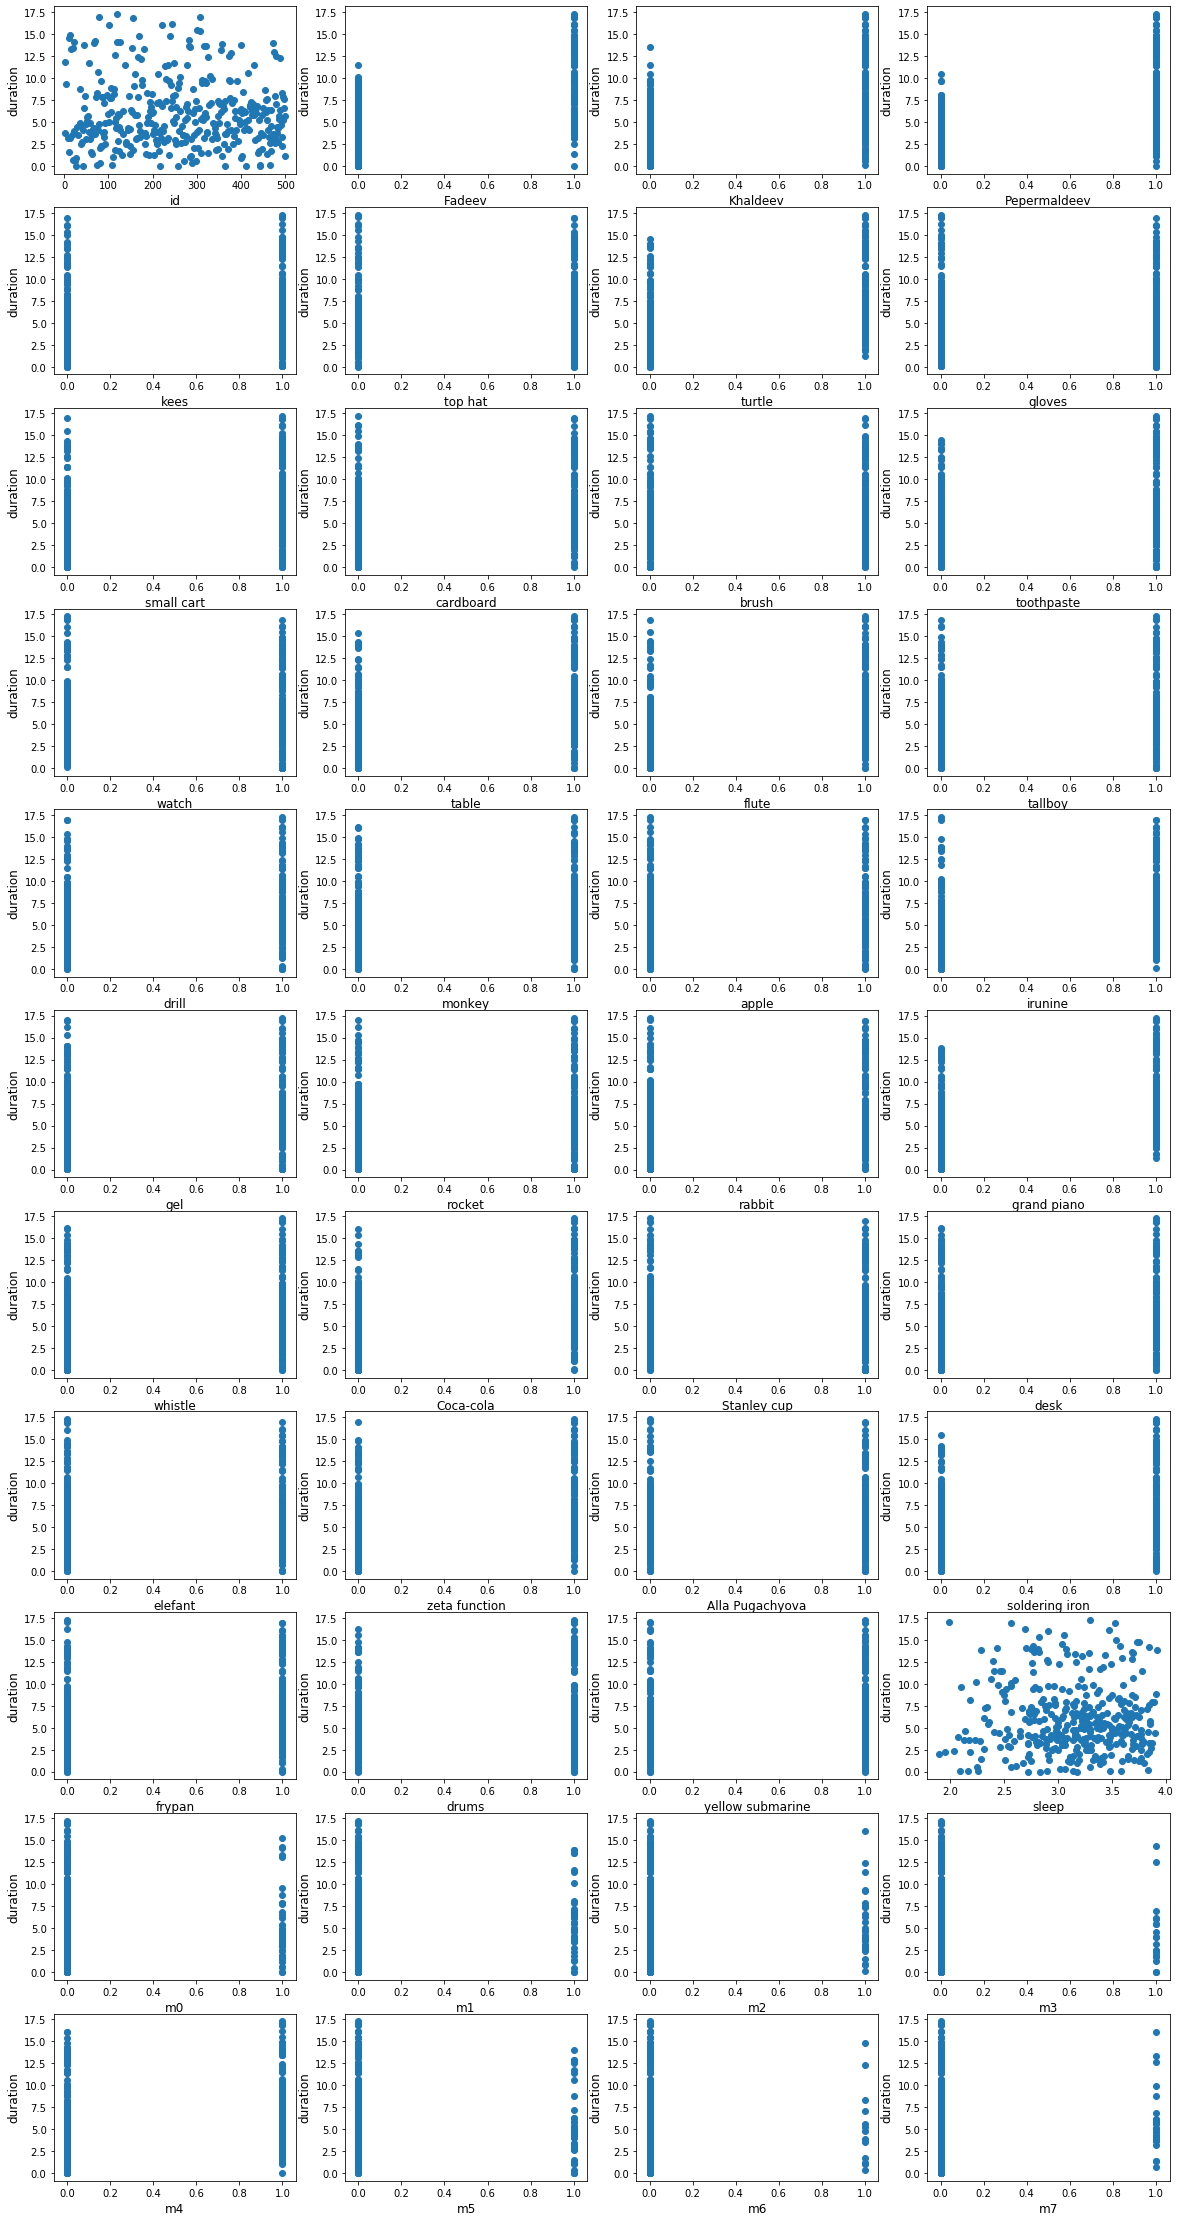

In [28]:
duration = np.array(train_data['duration'])
plt.figure(figsize=(20, 40))
for i, tag in enumerate(list(train_data.columns)[:-1]):
    plt.subplot(11, 4, i+1)
    plt.scatter(np.array(train_data[tag]), duration)
    plt.xlabel(tag, fontsize=12)
    plt.ylabel('duration',fontsize=12)
plt.show()

Видим, что длительность прогулки мистера Фаттахова сильно зависит от присутствия друзей. Добавим эти признаки в нашу модель (по двое и всех трёх).

In [29]:
data['F + K'] = data['Fadeev'] * data['Khaldeev']
data['F + P'] = data['Fadeev'] * data['Pepermaldeev']
data['K + P'] = data['Khaldeev'] * data['Pepermaldeev']
data['F + K + P'] = data['Fadeev'] * data['Khaldeev'] * data['Pepermaldeev']

In [40]:
train_data.head()

,id,Fadeev,Khaldeev,Pepermaldeev,kees,top hat,turtle,gloves,small cart,cardboard,...,m3,m4,m5,m6,m7,duration,F + K,F + P,K + P,F + K + P
0,1,1,1,1,0,0,0,1,1,1,...,0.0,1.0,0.0,0.0,0.0,11.851099,1,1,1,1
2,3,0,0,1,1,1,1,1,1,0,...,0.0,0.0,0.0,0.0,1.0,3.751619,0,0,0,0
3,4,1,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,9.366979,1,1,1,1
7,8,0,0,0,0,0,0,0,0,1,...,0.0,1.0,0.0,0.0,0.0,3.130255,0,0,0,0
10,11,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.545275,0,0,0,0


In [41]:
test_indexes = np.where(data.isnull().values[:,-5])
train_indexes = np.where(data.isnull().values[:,-5] == False)
test_data = data.iloc[test_indexes]
train_data = data.iloc[train_indexes]

In [42]:
X = train_data.drop('duration', axis=1)
y = train_data['duration']

In [43]:
lr_new = LinearRegression()
lr_new.fit(X, y)
prediction_new = lr_new.predict(X)

In [44]:
np.sqrt(mean_squared_error(prediction_new, y))

0.46558617518534784

In [46]:
sample = pd.read_csv('hw9t3_sample (1).csv')
X = data.drop('duration', axis=1)
predictions = lr_new.predict(X)
sample.duration = predictions
sample.to_csv('task9-3.csv', index=False)